<a href="https://colab.research.google.com/github/eftekhar-hossain/SKBI_Training/blob/main/Intermediate/Session_9_(RNN_%26_Hybrid_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> <u> <font color='red'> Training on AI and ML with Python (Intermediate) </font> </u> </h1> </center>

In [55]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow import keras

CPU times: user 52 µs, sys: 5 µs, total: 57 µs
Wall time: 64.4 µs


# Bangla Book Review Dataset


In [56]:
!wget -O reviews.csv https://www.dropbox.com/s/k9q1zrdr26ycmhv/book-reviews.csv?dl=0

--2022-07-02 08:57:47--  https://www.dropbox.com/s/k9q1zrdr26ycmhv/book-reviews.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/k9q1zrdr26ycmhv/book-reviews.csv [following]
--2022-07-02 08:57:47--  https://www.dropbox.com/s/raw/k9q1zrdr26ycmhv/book-reviews.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc286b4aa561b1bf5a2e95f204c1.dl.dropboxusercontent.com/cd/0/inline/BoSoCg0DBokfohIL1fzyekGWhMmxd_GZAVVXxDg5CVqkXeqLxpUvxPmKBFjWVXNIZCD3y6AiKiE0AlJVadu__4y6Oh0G-bubpnpmi1Zs_Z7nQmeaiJewsrXhK8d6lWJaZ5ZVAt3XW9b_BbHmRXGX0uWJCT3OWSRssgdzSWyQ-WIl7g/file# [following]
--2022-07-02 08:57:47--  https://uc286b4aa561b1bf5a2e95f204c1.dl.dropboxusercontent.com/cd/0/inline/BoSoCg0DBokfohIL1fzyekGWhMmxd_GZAVVXxDg5CVqkXeqLxpU

In [57]:
%%time
               
dataset = pd.read_csv("reviews.csv")
dataset

CPU times: user 24.9 ms, sys: 6.98 ms, total: 31.9 ms
Wall time: 86.2 ms


In [ ]:
dataset

In [8]:
dataset.columns

Index(['Review', 'liked'], dtype='object')

In [9]:
number_of_classes = len(dataset['liked'].unique())

In [10]:
print('Total size of the dataset : ',len(dataset))

Total size of the dataset :  1444


In [58]:
# cleaning function
def cleaning(row):
  text = re.sub('[^\u0980-\u09FF]',' ', row) ## removing punctions
  return text 

dataset['cleaned'] = dataset.Review.apply(cleaning)  

In [59]:
## Printing the raw dataset
for i in list(np.random.randint(1,len(dataset),10)):
  print(dataset['cleaned'][i],"\n",dataset['liked'][i])

আমি মনে করি থ্রিলার প্রেমিদের জন্য আবশ্যক একটি বই  এর প্রতিটি অধ্যায়েই রয়েছে অসাধারণ থ্রিল যা আপনাকে বইয়ের সাথে আটকে রাখতে বাধ্য করবে   
 1
বালমার্কা উপন্যাস  
 0
বাংলা ভাষাকে অপমানের জন্য এই একটি বই যথেষ্ট  
 0
এক কথায় অসাধারন 
 1
বই টি অনেক ভাল 
 1
অনেক বেশি তথ্যপূর্ণ একটি বই  যারা ঘুরে বেড়াতে পছন্দ করেন  তাদের পছন্দের তালিকায় এই বইটি অবশ্যই শীর্ষে থাকবে  ধন্যবাদ  আয়মান ভাইয়া আমার মত ভ্রমণ পিপাসুদের জন্য এমন দারুণ একটি বই উপহার দেয়ার জন্যে  
 1
অসাধারন একটি বই   বেশ মজার সাথে পড়ছি মাঝে মাঝে হাসি পাচ্ছে তবে অনেক কিছু শিখতে পারছি অনেক সহজভাবে যা আগে পারি নাই  বেসিকের জন্যএর চেয়ে ভালো বই আর হয় না  
 1
বিশেষ কিছু বলতে চাচ্ছি না এক কথায় অসাধারণ   বাকিটুকু পাঠকেরা নিজে পড়ে বুঝে নিন   
 1
লেখনি ভাল লাগেনি  ব্যঙ্গমা  ব্যঙ্গমি             
 0
এ ধরণের বইয়ে একটা ফাতরা ক্যারেক্টার থাকাই যথেষ্ট ছিল  সেখানে মৃন্ময়ীর দাদা  তার মা  মৃন্ময়ী নিজে  জহিরের বোন মিনা  তার স্বামী সবুজ টিয়া  এতগুলো ফাতরা আহ্লাদি ক্যারেক্টার না থাকাটাই ভাল হত  যারা আজ চিত্রার বিয়ে বইটি পড়েছেন  যারা একটু লক্ষ্য করলেই দেখবেন 

# Data Preprocessing


###Tokenization

In [60]:
%%time
max_words = 100000

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token=None, document_count=0)

tokenizer.fit_on_texts(dataset['cleaned'])

CPU times: user 59 ms, sys: 2.89 ms, total: 61.9 ms
Wall time: 61.9 ms


### Attributes of Tokenizer
1. word_counts: A dictionary of words and their counts.

2. word_docs: A dictionary of words and how many documents each appeared in.

3. word_index: A dictionary of words and their uniquely assigned integers.

4. document_count:An integer count of the total number of documents that were used to fit the Tokenizer.

By using these attributes we can find the most frequent words and less frequent words and words that might be useful for our system

In [61]:
%%time
word_counts = tokenizer.word_counts
word_docs = tokenizer.word_docs
word_index = tokenizer.word_index
document_count = tokenizer.document_count

print(len(word_counts))

7585
CPU times: user 1.78 ms, sys: 32 µs, total: 1.82 ms
Wall time: 1.62 ms


In [17]:
# Printing the values to understand their functions
def print_func(i, j):
    print(i, j)

print("Words ===> Counts")
k = 0
for (i, j) in word_counts.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("\nWords ===> Documents")       
for (i, j) in word_docs.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("\nWords ===> Index")
for (i, j) in word_index.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("Total Number of Documents: ", document_count)

Words ===> Counts
বই 1078
টি 34
আমার 294
সংগ্রহে 11
আছে 110
এবং 158
তা 84
আমি 200
পড়েছি 28
সম্পর্কে 43

Words ===> Documents
যদি 50
করেন 16
রেমিটেন্স 1
দেয়া 18
তা 66
থেকে 127
এড্রেস 1
ই 34
ফরেন 1
তার 98

Words ===> Index
বই 1
এই 2
বইটি 3
না 4
ভালো 5
একটি 6
অনেক 7
জন্য 8
একটা 9
আমার 10
Total Number of Documents:  1444


### Frequency Distribution of Data Length
Here frequency of each length will be counted to find out which lenth size is more appropiate at the time of using pad sequences. we all plot this frequency in histogram to get a visual understanding.

In [ ]:
Length_frequency = {}

for i in range(len(dataset)):
     index = len(dataset['cleaned'][i])
     Length_frequency[index] = Length_frequency.get(index, 0)+1


Text(0.5, 1.0, 'Length-Frequency Distribution')

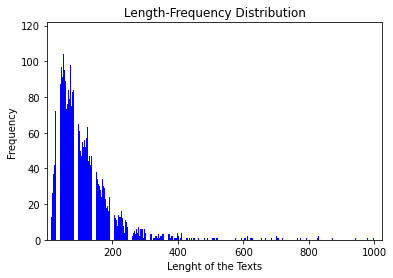

In [ ]:
import seaborn as sns

plt.bar(list(Length_frequency.keys()), Length_frequency.values(), color ='b')
plt.xlim(1, 1024)

plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')

### Encoding Data into Numbers
To encode our text into numbers we will use  text_to_word_sequence function from keras.

In [62]:
%%time
# Convert string into list of integer indices
sequences = tokenizer.texts_to_sequences(dataset['cleaned'])

CPU times: user 47.1 ms, sys: 963 µs, total: 48.1 ms
Wall time: 49.1 ms


In [63]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# print(dataset['cleaned'][3])
# print(sequences[1])

Found 7585 unique tokens.


### Pad Sequence
To make all the texts fo the same length we will use pad sequence from keras to standardize their length.

Corpus contain our final processed data and labels contains the labels of associated data.

In [64]:
%%time
## Before padding length of different training examples 
mx = len(sequences[0])
for x in sequences:
  mx =max(mx, len(x))
print("Maximum Text length",mx)

##We can also determine maxlen by plotting the frequency distribution of the lengths
corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0, padding='post', maxlen= 100)
## We get the maxlen value from the Length frequency distribution

print(corpus[1])


Maximum Text length 568
[111   1 121 121 153 173   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
CPU times: user 9.61 ms, sys: 1.06 ms, total: 10.7 ms
Wall time: 11.5 ms


In [21]:
print("Shape of the courpus: ", corpus.shape)

for i in range(2):
    print(dataset['cleaned'][i],"\n",corpus[i])

Shape of the courpus:  (1444, 100)
বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি  বই টি সম্পর্কে যদি এক কথায় বলতে হয় তবে বলবো মন্দের ভালো   খুবই সাধারন মানের আলোচনা করা হয়েছে ফরেক্স নিয়ে তবে অপ্রয়োজনীয় গল্প লিখে আর নিজের প্রকাশিত বইয়ের বিজ্ঞাপন দিযে বইয়ের পেজের সংখ্যা বাড়ানো হয়েছে শুধু   কয়েকটি উদাহরন দিলে বুঝতে পারবে   ফরেন রেমিটেন্স কি কিভাবে দেশের কাজে লাগে কিভাবে ইমেল এড্রেস খুলতে হয় এসব আলাপ করা হয়েছে  কিন্তু লেখক তার বই তে ডিফল্ট করা কোন ইন্ডিকেটর ই এ ট্রেডিং প্ল্যান  মানি মেনেজমেন্টে ইত্যাদি নিয়ে এক বর্ন আলোচনা করেন নাই  এমন কি ট্রেডিং প্লাটফর্মের বিভিন্ন অপশন নিয়ে দায়সারা বর্নণা দিয়েছেন  সাথে রয়েছে অসংখ্য বানান ভুল  বইয়ের ৪৭৯ টি পেজের মধ্য ৩২২ থেকে ৪৭৯ নাম্বার পেজ পর্যন্ত ১৫৭ টি পেজে যা রয়েছে তা  অতিকথন  বা  পুনরায় প্রচার  ছাড়া কিছুই না  একটি টিউটোরিয়াল সিডি দেয়া হয়েছে  তা অতি স্বল্প আলোচনা করা হয়েছে  
 [3076   30 1426  778 1427   20  121  694  695  902  193  396 3077 3078
   60  130  696  214  107  130 3079 3080 3081   32  460 1918   39   20
   38   33   36    1  505 3082   39   42 

## Creating Train, Test and Validation set


In [65]:
X_train,X_test,y_train,y_test = train_test_split(corpus,dataset['liked'],test_size = 0.2, random_state = 0)

print("Training Size: ",X_train.shape)
print("Test Size: ",X_test.shape)

Training Size:  (1155, 100)
Test Size:  (289, 100)


## Single Layer LSTM with Keras Embedding


In [66]:
# Keras Functional API

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D, Bidirectional, LSTM, GRU
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model

In [34]:
keras.backend.clear_session()

max_length = 100
embedding_dim = 64
number_of_classes = len(dataset['liked'].unique())

# define bilstm model

def lstm():


   ###### BiLSTM Model #######
  bi_text_inputs = Input(shape=(max_length,))
  bi_embedding_layer = Embedding(max_words,embedding_dim)(bi_text_inputs)
  LSTM_Layer_1 = Bidirectional(LSTM(32))(bi_embedding_layer)
  bi_dense_layer_1 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
  bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)


  return bilstm_model

# call the model
lstm_model = lstm()

lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 64)           6400000   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               24832     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 6,424,897
Trainable params: 6,424,897
Non-trainable params: 0
_________________________________________________________________


In [35]:
lstm_model.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics =['accuracy'])

In [36]:
%%time
history = lstm_model.fit(X_train,
                              y_train,
                              epochs = 20,
                              batch_size = 16,
                              verbose = 1,
                              validation_split =0.1)

Epoch 1/20
65/65 [==============================] - 5s 27ms/step - loss: 0.6003 - accuracy: 0.6843 - val_loss: 0.5529 - val_accuracy: 0.6724
Epoch 2/20
65/65 [==============================] - 1s 14ms/step - loss: 0.3332 - accuracy: 0.8662 - val_loss: 0.3431 - val_accuracy: 0.8707
Epoch 3/20
65/65 [==============================] - 1s 14ms/step - loss: 0.1322 - accuracy: 0.9769 - val_loss: 0.2630 - val_accuracy: 0.8879
Epoch 4/20
65/65 [==============================] - 1s 13ms/step - loss: 0.0540 - accuracy: 0.9913 - val_loss: 0.2029 - val_accuracy: 0.9138
Epoch 5/20
65/65 [==============================] - 1s 13ms/step - loss: 0.0305 - accuracy: 0.9952 - val_loss: 0.3007 - val_accuracy: 0.8879
Epoch 6/20
65/65 [==============================] - 1s 14ms/step - loss: 0.0221 - accuracy: 0.9971 - val_loss: 0.2227 - val_accuracy: 0.9397
Epoch 7/20
65/65 [==============================] - 1s 13ms/step - loss: 0.0134 - accuracy: 0.9990 - val_loss: 0.2113 - val_accuracy: 0.9483
Epoch 8/20
65

#### Plotting accuracy and loss graphs

Finaly loss and accuracy graph is plotted to take some important decision such as after how many epochs our model starts to overfit, what batch size give us better result, whether we need to get more data or not.

In [37]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

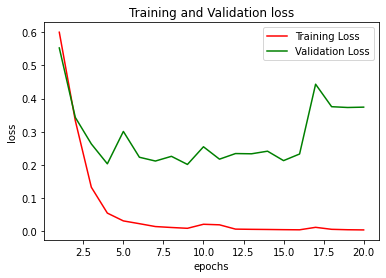

In [38]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

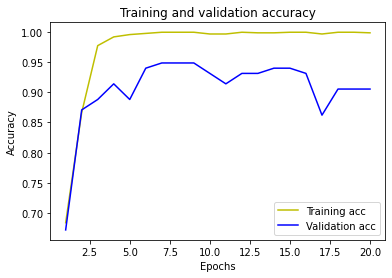

In [39]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [ ]:
y_pred = lstm_model.predict(X_test)
y_pred = (y_pred>0.5).astype('int')
y_pred

###Performance 

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       102
           1       0.89      0.91      0.90       187

    accuracy                           0.87       289
   macro avg       0.86      0.85      0.86       289
weighted avg       0.87      0.87      0.87       289



In [45]:
confusion_matrix(y_test,y_pred)

array([[ 81,  21],
       [ 16, 171]])

# Stacked LSTM




###Checkpoint

In [46]:
''' Callbacks with Checkpoint'''

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "mymodel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint] 


In [48]:
keras.backend.clear_session()

max_length = 100
embedding_dim = 64
number_of_classes = len(dataset['liked'].unique())

# define bilstm model

def stacked_lstm():


   ###### BiLSTM Model #######
  bi_text_inputs = Input(shape=(max_length,))
  bi_embedding_layer = Embedding(max_words,embedding_dim)(bi_text_inputs)
  LSTM_Layer_1 = Bidirectional(LSTM(16,return_sequences = True))(bi_embedding_layer)
  LSTM_Layer_2 = Bidirectional(LSTM(8))(LSTM_Layer_1)
  bi_dense_layer_1 = Dense(1, activation='sigmoid')(LSTM_Layer_2)
  bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)


  return bilstm_model

# call the model
stacked_lstm_model = stacked_lstm()

stacked_lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 64)           6400000   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 32)          10368     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 16)               2624      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 6,413,009
Trainable params: 6,413,009
Non-train

In [50]:
stacked_lstm_model.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics =['accuracy'])

In [51]:
%%time
history = stacked_lstm_model.fit(X_train,
                              y_train,
                              epochs = 20,
                              batch_size = 16,
                              verbose = 1,
                              validation_split =0.1,
                              callbacks = callback_list)

Epoch 1/20
64/65 [============================>.] - ETA: 0s - loss: 0.6182 - accuracy: 0.6689
Epoch 1: val_accuracy improved from -inf to 0.67241, saving model to mymodel.h5
65/65 [==============================] - 68s 973ms/step - loss: 0.6183 - accuracy: 0.6689 - val_loss: 0.5919 - val_accuracy: 0.6724
Epoch 2/20
64/65 [============================>.] - ETA: 0s - loss: 0.3859 - accuracy: 0.8369
Epoch 2: val_accuracy improved from 0.67241 to 0.86207, saving model to mymodel.h5
65/65 [==============================] - 2s 32ms/step - loss: 0.3835 - accuracy: 0.8383 - val_loss: 0.3508 - val_accuracy: 0.8621
Epoch 3/20
64/65 [============================>.] - ETA: 0s - loss: 0.1124 - accuracy: 0.9727
Epoch 3: val_accuracy improved from 0.86207 to 0.89655, saving model to mymodel.h5
65/65 [==============================] - 2s 24ms/step - loss: 0.1112 - accuracy: 0.9731 - val_loss: 0.3302 - val_accuracy: 0.8966
Epoch 4/20
64/65 [============================>.] - ETA: 0s - loss: 0.0386 - acc

In [ ]:
y_pred = stacked_lstm_model.predict(X_test)
y_pred = (y_pred>0.5).astype('int')
y_pred

###Performance 

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.88      0.94      0.91       187

    accuracy                           0.88       289
   macro avg       0.88      0.86      0.87       289
weighted avg       0.88      0.88      0.88       289



In [54]:
confusion_matrix(y_test,y_pred)

array([[ 79,  23],
       [ 11, 176]])

# BiLSTM + CNN

In [67]:
keras.backend.clear_session()

max_length = 100
embedding_dim = 64
number_of_classes = len(dataset['liked'].unique())

# define bilstm + Cnn model

def lstm_cnn():


  lc_text_inputs = Input(shape=(max_length,))
  lc_embedding_layer = Embedding(max_words,embedding_dim)(lc_text_inputs)
  LSTM_Layer = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
  lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer)
  lc_pool1 = MaxPooling1D(2)(lc_conv1)
  lc_flat = Flatten()(lc_pool1)
  lc_dense_layer_1 = Dense(1, activation='sigmoid')(lc_flat)
  cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)


  return cnn_lstm_model

# call the model
lstm_cnn_model = lstm_cnn()

lstm_cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 64)           6400000   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 64)          24832     
 l)                                                              
                                                                 
 conv1d (Conv1D)             (None, 99, 32)            4128      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1568)              0     

In [68]:
lstm_cnn_model.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics =['accuracy'])

In [69]:
%%time
history = lstm_cnn_model.fit(X_train,
                              y_train,
                              epochs = 20,
                              batch_size = 16,
                              verbose = 1,
                              validation_split =0.1,
                              callbacks = callback_list)

Epoch 1/20
65/65 [==============================] - ETA: 0s - loss: 0.6167 - accuracy: 0.6737
Epoch 1: val_accuracy did not improve from 0.91379
65/65 [==============================] - 13s 42ms/step - loss: 0.6167 - accuracy: 0.6737 - val_loss: 0.6158 - val_accuracy: 0.6724
Epoch 2/20
64/65 [============================>.] - ETA: 0s - loss: 0.2581 - accuracy: 0.8994
Epoch 2: val_accuracy did not improve from 0.91379
65/65 [==============================] - 1s 23ms/step - loss: 0.2547 - accuracy: 0.9009 - val_loss: 0.3962 - val_accuracy: 0.8276
Epoch 3/20
64/65 [============================>.] - ETA: 0s - loss: 0.0664 - accuracy: 0.9775
Epoch 3: val_accuracy did not improve from 0.91379
65/65 [==============================] - 2s 31ms/step - loss: 0.0655 - accuracy: 0.9779 - val_loss: 0.4276 - val_accuracy: 0.8534
Epoch 4/20
64/65 [============================>.] - ETA: 0s - loss: 0.0264 - accuracy: 0.9912
Reached 99.00% accuracy so we will stop trianing

Epoch 4: val_accuracy did not 

In [71]:
lstm_cnn = load_model("mymodel.h5")

In [ ]:
y_pred = lstm_cnn.predict(X_test)
y_pred = (y_pred>0.5).astype('int')
y_pred

###Performance 

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.88      0.94      0.91       187

    accuracy                           0.88       289
   macro avg       0.88      0.86      0.87       289
weighted avg       0.88      0.88      0.88       289



In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 79,  23],
       [ 11, 176]])